# Project 3
-----
## Notebook 2: Modeling
-----
---

#### The goal of this notebook is to evaluate the performance of multiple models on the `lemm_text`, `lemm_title`, `stem_text`, `stem_title` features to find the best performing model and parameters

#### Evaluate `LogisticRegression`, `KNeighborsClassifier`, `DecisionTreeClassifier`, and `NaiveBayes` models with both `CountVectorizer` and `TfidfVectorizer`

---
----
#### Imports and Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import ConfusionMatrixDisplay, recall_score, precision_score, balanced_accuracy_score, f1_score, RocCurveDisplay

In [2]:
df = pd.read_csv('./P4_Datasets/programming_languages')

####
-----
----

### 1. Lemmatized text - Logistic Regression with Count Vectorizer

In [3]:
X = df['lemm_text']
y = df['target']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = .2)

In [5]:
lemm_pipe = make_pipeline(
    CountVectorizer(),
    StandardScaler(with_mean = False),
    LogisticRegression(max_iter = 1_000_000))

In [6]:
lemm_pipe.get_params()

{'memory': None,
 'steps': [('countvectorizer', CountVectorizer()),
  ('standardscaler', StandardScaler(with_mean=False)),
  ('logisticregression', LogisticRegression(max_iter=1000000))],
 'verbose': False,
 'countvectorizer': CountVectorizer(),
 'standardscaler': StandardScaler(with_mean=False),
 'logisticregression': LogisticRegression(max_iter=1000000),
 'countvectorizer__analyzer': 'word',
 'countvectorizer__binary': False,
 'countvectorizer__decode_error': 'strict',
 'countvectorizer__dtype': numpy.int64,
 'countvectorizer__encoding': 'utf-8',
 'countvectorizer__input': 'content',
 'countvectorizer__lowercase': True,
 'countvectorizer__max_df': 1.0,
 'countvectorizer__max_features': None,
 'countvectorizer__min_df': 1,
 'countvectorizer__ngram_range': (1, 1),
 'countvectorizer__preprocessor': None,
 'countvectorizer__stop_words': None,
 'countvectorizer__strip_accents': None,
 'countvectorizer__token_pattern': '(?u)\\b\\w\\w+\\b',
 'countvectorizer__tokenizer': None,
 'countvector

In [7]:
lemm_gs = GridSearchCV(
    lemm_pipe, 
    param_grid = {'countvectorizer__max_features': [250, 275, 290],
                  'countvectorizer__ngram_range': [(1, 2), (1, 3)],
                  'logisticregression__C': [10, 15]
                 }
)

In [8]:
lemm_gs.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('countvectorizer', CountVectorizer()),
                                       ('standardscaler',
                                        StandardScaler(with_mean=False)),
                                       ('logisticregression',
                                        LogisticRegression(max_iter=1000000))]),
             param_grid={'countvectorizer__max_features': [250, 275, 290],
                         'countvectorizer__ngram_range': [(1, 2)],
                         'logisticregression__C': [10, 15]})

In [9]:
lemm_gs.best_params_

{'countvectorizer__max_features': 250,
 'countvectorizer__ngram_range': (1, 2),
 'logisticregression__C': 10}

In [10]:
lemm_gs.score(X_test, y_test)

0.7700348432055749

In [11]:
lemm_logcv_preds = lemm_gs.predict(X_test)

In [12]:
precision_score(y_test, lemm_logcv_preds)

0.7883211678832117

In [13]:
recall_score(y_test, lemm_logcv_preds)

0.7448275862068966

In [14]:
balanced_accuracy_score(y_test, lemm_logcv_preds)

0.7703011170471104

In [15]:
f1_score(y_test, lemm_logcv_preds)

0.7659574468085107

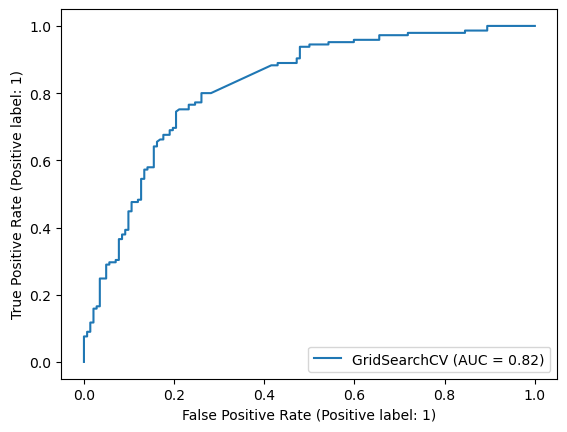

In [16]:
RocCurveDisplay.from_estimator(lemm_gs, X_test, y_test);

-------
----

-----
----

### 2. Lemmatized text - Decision Tree with Tfidf Vectorizer

In [17]:
lemm_pipe_2 = make_pipeline(
    TfidfVectorizer(),
    StandardScaler(with_mean = False),
    DecisionTreeClassifier()
)

In [18]:
lemm_gs_2 = GridSearchCV(
    lemm_pipe_2, 
    param_grid = {'tfidfvectorizer__max_features': [450, 500, 600],
                  'tfidfvectorizer__ngram_range': [(1, 2), (1, 1)],
                  'decisiontreeclassifier__max_depth': [10, 20, 40, 100],
                  'decisiontreeclassifier__min_samples_split': [3, 5, 10, 20]
                 }
)

In [19]:
lemm_gs_2.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                                       ('standardscaler',
                                        StandardScaler(with_mean=False)),
                                       ('decisiontreeclassifier',
                                        DecisionTreeClassifier())]),
             param_grid={'decisiontreeclassifier__max_depth': [10, 20, 40, 100],
                         'decisiontreeclassifier__min_samples_split': [3, 5, 10,
                                                                       20],
                         'tfidfvectorizer__max_features': [450, 500, 600],
                         'tfidfvectorizer__ngram_range': [(1, 2), (1, 1)]})

In [20]:
lemm_gs_2.score(X_test, y_test)

0.8292682926829268

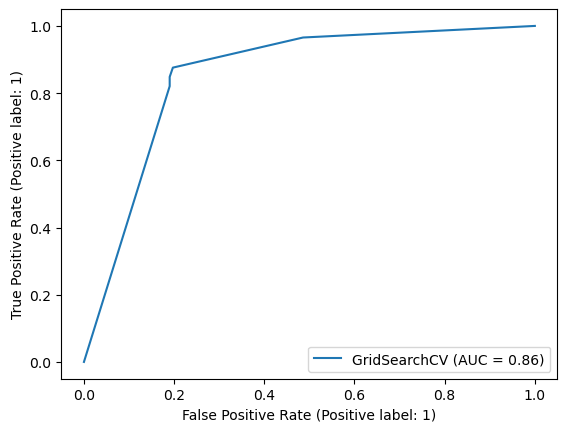

In [21]:
RocCurveDisplay.from_estimator(lemm_gs_2, X_test, y_test)

In [22]:
precision_score(y_test, lemm_gs_2.predict(X_test))

0.82

In [23]:
recall_score(y_test, lemm_gs_2.predict(X_test))

0.8482758620689655

In [24]:
balanced_accuracy_score(y_test, lemm_gs_2.predict(X_test))

0.8290675084992716

In [25]:
f1_score(y_test, lemm_gs_2.predict(X_test))

0.8338983050847457

-----
---

### 3. Lemmatized text - Naive Bayes with Tfidf Vectorizer

In [26]:
lemm_pipe_3 = make_pipeline(
    TfidfVectorizer(),
    StandardScaler(with_mean = False),
    MultinomialNB()
)

In [27]:
lemm_gs_3 = GridSearchCV(
    lemm_pipe_3, 
    param_grid = {'tfidfvectorizer__max_features': [450, 500, 600],
                  'tfidfvectorizer__ngram_range': [(1, 2), (1, 1)],
                  'multinomialnb__alpha': [0.1, 1, 10, 50, 100]
                 }
)

In [28]:
lemm_gs_3.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                                       ('standardscaler',
                                        StandardScaler(with_mean=False)),
                                       ('multinomialnb', MultinomialNB())]),
             param_grid={'multinomialnb__alpha': [0.1, 1, 10, 50, 100],
                         'tfidfvectorizer__max_features': [450, 500, 600],
                         'tfidfvectorizer__ngram_range': [(1, 2), (1, 1)]})

In [29]:
lemm_gs_3.score(X_test, y_test)

0.7700348432055749

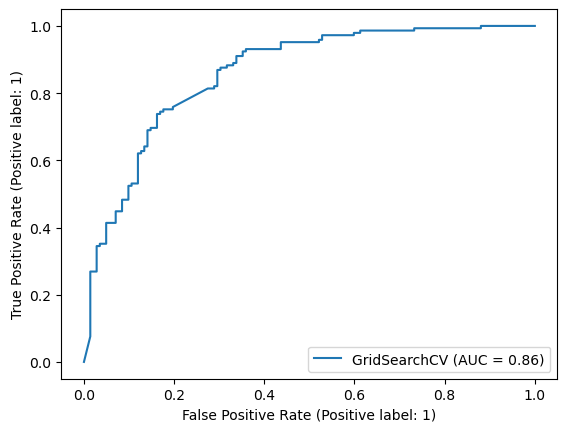

In [30]:
RocCurveDisplay.from_estimator(lemm_gs_3, X_test, y_test)

In [31]:
recall_score(y_test, lemm_gs_3.predict(X_test))

0.8137931034482758

In [32]:
precision_score(y_test, lemm_gs_3.predict(X_test))

0.7515923566878981

In [33]:
balanced_accuracy_score(y_test, lemm_gs_3.predict(X_test))

0.7695726080621661

In [34]:
f1_score(y_test, lemm_gs_3.predict(X_test))

0.7814569536423841

## Section 1: Functions

#### First Function:
- Accepts a classifier, X variable, and y variable as arguments 
- Uses a pipeline with CountVectorizer, StandardScaler, and the classifier passed to the function
- Uses GridSearchCV to search over the best parameters for count vectorizer
- Train / Test splits the data
- Fits the model
- Makes predictions
- Evaluates the models performance
- Retuns a DataFrame with the model's performance metrics

#### Second Function: 
- Same thing as above, but use TfidfVectorizer instead of CountVectorizer

In [35]:
def model_eval_cvect(classifier, X, y):
    pipe = make_pipeline(
        CountVectorizer(),
        StandardScaler(with_mean = False),
        classifier
        )
         
    gs = GridSearchCV(
        pipe,
        param_grid = {
            'countvectorizer__max_features': [350, 450, 550, 650],
            'countvectorizer__ngram_range': [(1, 2), (1, 1)]
            })
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = .2)
    
    gs.fit(X_train, y_train)
    
    preds = gs.predict(X_test)
    
    test_score = gs.score(X_test, y_test)
    
    train_score = gs.score(X_train, y_train)
    
    balanced_accuracy = balanced_accuracy_score(y_test, preds)

    precision = precision_score(y_test, preds)
    
    recall = recall_score(y_test, preds)
    
    f1 = f1_score(y_test, preds)
        
    metrics = {
        'Test Data Accuracy': test_score,
        'Train Data Accuracy': train_score,
        'Balanced Accuracy Score': balanced_accuracy,
        'Precision': precision,
        'Recall': recall,
        'f1 score': f1,
    }
        
    return pd.DataFrame(metrics.values(), index = metrics.keys(), columns = [f'{classifier} with CVect - Metrics'])
    
    

In [36]:
def model_eval_tfidf(classifier, X, y):
    pipe = make_pipeline(
        TfidfVectorizer(),
        StandardScaler(with_mean = False),
        classifier
        )
         
    gs = GridSearchCV(
        pipe,
        param_grid = {
            'tfidfvectorizer__max_features': [350, 450, 550, 650],
            'tfidfvectorizer__ngram_range': [(1, 2), (1, 1)]
            })
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = .2)
    
    gs.fit(X_train, y_train)
    
    preds = gs.predict(X_test)
    
    test_score = gs.score(X_test, y_test)
    
    train_score = gs.score(X_train, y_train)
    
    balanced_accuracy = balanced_accuracy_score(y_test, preds)

    precision = precision_score(y_test, preds)
    
    recall = recall_score(y_test, preds)
    
    f1 = f1_score(y_test, preds)
        
    metrics = {
        'Test Data Accuracy': test_score,
        'Train Data Accuracy': train_score,
        'Balanced Accuracy Score': balanced_accuracy,
        'Precision': precision,
        'Recall': recall,
        'f1 score': f1,
    }
        
    return pd.DataFrame(metrics.values(), index = metrics.keys(), columns = [f'{classifier} with TfidfVect - Metrics'])

-----

------

## Section 2: Model, Predict, & Evaluate

#### Create and evaluate the following models on the following columns using **BOTH** functions above (with CountVectorizer and TfidfVectorizer):

**Models**:
- `LogistisicRegression`
- `KNeighborsClassifier`
- `DecisionTreeClassifier`
- `MultinomialNB` 


**Columns**:
- `lemm_title`
- `lemm_text`
- `stem_title`
- `stem_text`


#### Evaluate one model type at a time, but on each feature and function consecutively in order to find the best model.

### I. Logistic Regression

#### with CountVectorizer

In [37]:
#Logistic Regression - cvect - lemm_title

logr_cvect_lemm_title = model_eval_cvect(LogisticRegression(C = .2), 
                                    X = df['lemm_title'], 
                                    y = df['target'])

logr_cvect_lemm_title

,LogisticRegression(C=0.2) with CVect - Metrics
Test Data Accuracy,0.822300
Train Data Accuracy,0.958952
Balanced Accuracy Score,0.821442
Precision,0.779762
Recall,0.903448
f1 score,0.837061


In [38]:
logr_cvect_lemm_title['LogisticRegression(C=0.2) with CVect - Metrics'].mean()

0.8538274913205015

In [39]:
#Logistic Regression - cvect - lemm_text

logr_cvect_lemm_text = model_eval_cvect(LogisticRegression(C = .5), 
                                        X = df['lemm_text'], 
                                        y = df['target'])

logr_cvect_lemm_text

,LogisticRegression(C=0.5) with CVect - Metrics
Test Data Accuracy,0.770035
Train Data Accuracy,0.947598
Balanced Accuracy Score,0.769791
Precision,0.761589
Recall,0.793103
f1 score,0.777027


In [40]:
logr_cvect_lemm_text['LogisticRegression(C=0.5) with CVect - Metrics'].mean()

0.8031906894191221

In [41]:
#Logistic Regression - cvect - stem_title

logr_cvect_stem_title = model_eval_cvect(LogisticRegression(), 
                                        X = df['stem_title'], 
                                        y = df['target'])

logr_cvect_stem_title

,LogisticRegression() with CVect - Metrics
Test Data Accuracy,0.797909
Train Data Accuracy,0.970306
Balanced Accuracy Score,0.796867
Precision,0.751445
Recall,0.896552
f1 score,0.817610


In [42]:
logr_cvect_stem_title['LogisticRegression() with CVect - Metrics'].mean()

0.8384482282703926

In [43]:
#Logistic Regression - cvect - stem_text

logr_cvect_stem_text = model_eval_cvect(LogisticRegression(C = .6), 
                                        X = df['stem_text'], 
                                        y = df['target'])

logr_cvect_stem_text

,LogisticRegression(C=0.6) with CVect - Metrics
Test Data Accuracy,0.804878
Train Data Accuracy,0.959825
Balanced Accuracy Score,0.804274
Precision,0.776398
Recall,0.862069
f1 score,0.816993


In [44]:
logr_cvect_stem_text['LogisticRegression(C=0.6) with CVect - Metrics'].mean()

0.8374062067945371

#### with TfidfVectorizer

In [45]:
#Logistic Regression - tfidf - lemm_title

logr_tfidf_lemm_title = model_eval_tfidf(LogisticRegression(), 
                                        X = df['lemm_title'], 
                                        y = df['target'])

logr_tfidf_lemm_title

,LogisticRegression() with TfidfVect - Metrics
Test Data Accuracy,0.808362
Train Data Accuracy,0.981659
Balanced Accuracy Score,0.807212
Precision,0.755682
Recall,0.917241
f1 score,0.828660


In [46]:
logr_tfidf_lemm_title['LogisticRegression() with TfidfVect - Metrics'].mean()

0.8498029384274082

In [47]:
#Logistic Regression - tfidf - lemm_text

logr_tfidf_lemm_text = model_eval_tfidf(LogisticRegression(), 
                                        X = df['lemm_text'], 
                                        y = df['target'])

logr_tfidf_lemm_text

,LogisticRegression() with TfidfVect - Metrics
Test Data Accuracy,0.801394
Train Data Accuracy,0.965939
Balanced Accuracy Score,0.800753
Precision,0.771605
Recall,0.862069
f1 score,0.814332


In [48]:
logr_tfidf_lemm_text['LogisticRegression() with TfidfVect - Metrics'].mean()

0.8360152561359072

In [49]:
#Logistic Regression - tfidf - stem_title

logr_tfidf_stem_title = model_eval_tfidf(LogisticRegression(), 
                                        X = df['stem_title'], 
                                        y = df['target'])

logr_tfidf_stem_title

,LogisticRegression() with TfidfVect - Metrics
Test Data Accuracy,0.773519
Train Data Accuracy,0.970306
Balanced Accuracy Score,0.772657
Precision,0.738095
Recall,0.855172
f1 score,0.792332


In [50]:
logr_tfidf_stem_title['LogisticRegression() with TfidfVect - Metrics'].mean()

0.8170135650516123

In [53]:
#Logistic Regression - tfidf - stem_text

logr_tfidf_stem_text = model_eval_tfidf(LogisticRegression(max_iter = 1_000_000), 
                                        X = df['stem_text'], 
                                        y = df['target'])

logr_tfidf_stem_text

,LogisticRegression(max_iter=1000000) with TfidfVect - Metrics
Test Data Accuracy,0.829268
Train Data Accuracy,0.986026
Balanced Accuracy Score,0.828558
Precision,0.792683
Recall,0.896552
f1 score,0.841424


In [55]:
logr_tfidf_stem_text['LogisticRegression(max_iter=1000000) with TfidfVect - Metrics'].mean()

0.8624184408255609

### II. KNN

#### with CountVectorizer

In [56]:
#KNN - cvect function - lemm_title

knn_cvect_lemm_title = model_eval_cvect(KNeighborsClassifier(), 
                                   X = df['lemm_title'], 
                                   y = df['target'])

knn_cvect_lemm_title

,KNeighborsClassifier() with CVect - Metrics
Test Data Accuracy,0.637631
Train Data Accuracy,0.735371
Balanced Accuracy Score,0.634531
Precision,0.589520
Recall,0.931034
f1 score,0.721925


In [57]:
knn_cvect_lemm_title['KNeighborsClassifier() with CVect - Metrics'].mean()

0.708335405675007

In [58]:
#KNN - cvect - lemm_text

knn_cvect_lemm_text = model_eval_cvect(KNeighborsClassifier(), 
                                       X = df['lemm_text'], 
                                       y = df['target'])

knn_cvect_lemm_text

,KNeighborsClassifier() with CVect - Metrics
Test Data Accuracy,0.665505
Train Data Accuracy,0.806114
Balanced Accuracy Score,0.666780
Precision,0.724771
Recall,0.544828
f1 score,0.622047


In [59]:
knn_cvect_lemm_text['KNeighborsClassifier() with CVect - Metrics'].mean()

0.6716740377314178

In [60]:
#KNN - cvect - stem_title

knn_cvect_stem_title = model_eval_cvect(KNeighborsClassifier(), 
                                   X = df['stem_title'], 
                                   y = df['target'])

knn_cvect_stem_title

,KNeighborsClassifier() with CVect - Metrics
Test Data Accuracy,0.700348
Train Data Accuracy,0.786900
Balanced Accuracy Score,0.698203
Precision,0.645320
Recall,0.903448
f1 score,0.752874


In [61]:
knn_cvect_stem_title['KNeighborsClassifier() with CVect - Metrics'].mean()

0.7478488404449655

In [62]:
#KNN - cvect - stem_text

knn_cvect_stem_text = model_eval_cvect(KNeighborsClassifier(), 
                                   X = df['stem_text'], 
                                   y = df['target'])

knn_cvect_stem_text

,KNeighborsClassifier() with CVect - Metrics
Test Data Accuracy,0.655052
Train Data Accuracy,0.803493
Balanced Accuracy Score,0.657018
Precision,0.755556
Recall,0.468966
f1 score,0.578723


In [63]:
knn_cvect_stem_text['KNeighborsClassifier() with CVect - Metrics'].mean()

0.6531346935884285

#### with TfidfVectorizer

In [64]:
### KNN - tfidf - lemm_title

knn_tfidf_lemm_title = model_eval_tfidf(KNeighborsClassifier(), 
                                        X = df['lemm_title'], 
                                        y = df['target'])

knn_tfidf_lemm_title

,KNeighborsClassifier() with TfidfVect - Metrics
Test Data Accuracy,0.672474
Train Data Accuracy,0.748472
Balanced Accuracy Score,0.670471
Precision,0.628141
Recall,0.862069
f1 score,0.726744


In [65]:
knn_tfidf_lemm_title['KNeighborsClassifier() with TfidfVect - Metrics'].mean()

0.7180617401457691

##### **KNN is providing consistently lower scores in all metrics than Logistic Regression is. Therefore we will stop creating any more KNN models at this point.**

### III. Decision Tree

#### with CountVectorizer

In [66]:
#Decision Tree - cvect - lemm_title

tree_cvect_lemm_title = model_eval_cvect(DecisionTreeClassifier(max_depth = 50), 
                                    X = df['lemm_title'], 
                                    y = df['target'])

tree_cvect_lemm_title

,DecisionTreeClassifier(max_depth=50) with CVect - Metrics
Test Data Accuracy,0.721254
Train Data Accuracy,0.840175
Balanced Accuracy Score,0.718820
Precision,0.654028
Recall,0.951724
f1 score,0.775281


In [67]:
tree_cvect_lemm_title['DecisionTreeClassifier(max_depth=50) with CVect - Metrics'].mean()

0.7768803860267611

In [68]:
#Decision Tree - cvect function - lemm_text 

tree_cvect_lemm_text = model_eval_cvect(DecisionTreeClassifier(max_depth = 50), 
                                        X = df['lemm_text'], 
                                        y = df['target'])

tree_cvect_lemm_text

,DecisionTreeClassifier(max_depth=50) with CVect - Metrics
Test Data Accuracy,0.777003
Train Data Accuracy,0.926638
Balanced Accuracy Score,0.777052
Precision,0.783217
Recall,0.772414
f1 score,0.777778


In [69]:
tree_cvect_lemm_text['DecisionTreeClassifier(max_depth=50) with CVect - Metrics'].mean()

0.8023502266629965

In [70]:
#Decision Tree - cvect function - stem_title 

tree_cvect_stem_title = model_eval_cvect(DecisionTreeClassifier(max_depth = 50), 
                                        X = df['stem_title'], 
                                        y = df['target'])

tree_cvect_stem_title

,DecisionTreeClassifier(max_depth=50) with CVect - Metrics
Test Data Accuracy,0.749129
Train Data Accuracy,0.841048
Balanced Accuracy Score,0.746916
Precision,0.678049
Recall,0.958621
f1 score,0.794286


In [71]:
tree_cvect_stem_title['DecisionTreeClassifier(max_depth=50) with CVect - Metrics'].mean()

0.7946746863090367

In [72]:
#Decision Tree - cvect function - stem_text 

tree_cvect_stem_text = model_eval_cvect(DecisionTreeClassifier(max_depth = 50), 
                                        X = df['stem_text'], 
                                        y = df['target'])

tree_cvect_stem_text

,DecisionTreeClassifier(max_depth=50) with CVect - Metrics
Test Data Accuracy,0.790941
Train Data Accuracy,0.949345
Balanced Accuracy Score,0.790991
Precision,0.797203
Recall,0.786207
f1 score,0.791667


In [73]:
tree_cvect_stem_text['DecisionTreeClassifier(max_depth=50) with CVect - Metrics'].mean()

0.8177254795595289

#### with TfidfVectorizer

In [74]:
#Decision Tree - tfidf function - lemm_title

tree_tfidf_lemm_title = model_eval_tfidf(DecisionTreeClassifier(max_depth = 50), 
                                        X = df['lemm_title'], 
                                        y = df['target'])

tree_tfidf_lemm_title

,DecisionTreeClassifier(max_depth=50) with TfidfVect - Metrics
Test Data Accuracy,0.707317
Train Data Accuracy,0.859389
Balanced Accuracy Score,0.704735
Precision,0.641860
Recall,0.951724
f1 score,0.766667


In [75]:
tree_tfidf_lemm_title['DecisionTreeClassifier(max_depth=50) with TfidfVect - Metrics'].mean()

0.7719487162625098

In [76]:
#Decision Tree - tfidf function - lemm_text

tree_tfidf_lemm_text = model_eval_tfidf(DecisionTreeClassifier(max_depth = 50), 
                                        X = df['lemm_text'], 
                                        y = df['target'])

tree_tfidf_lemm_text

,DecisionTreeClassifier(max_depth=50) with TfidfVect - Metrics
Test Data Accuracy,0.745645
Train Data Accuracy,0.932751
Balanced Accuracy Score,0.745653
Precision,0.750000
Recall,0.744828
f1 score,0.747405


In [77]:
tree_tfidf_lemm_text['DecisionTreeClassifier(max_depth=50) with TfidfVect - Metrics'].mean()

0.777713558537819

In [78]:
#Decision Tree - tfidf function - stem_title

tree_tfidf_stem_title = model_eval_tfidf(DecisionTreeClassifier(max_depth = 50), 
                                        X = df['stem_title'], 
                                        y = df['target'])

tree_tfidf_stem_title

,DecisionTreeClassifier(max_depth=50) with TfidfVect - Metrics
Test Data Accuracy,0.770035
Train Data Accuracy,0.862882
Balanced Accuracy Score,0.768116
Precision,0.700508
Recall,0.951724
f1 score,0.807018


In [79]:
tree_tfidf_stem_title['DecisionTreeClassifier(max_depth=50) with TfidfVect - Metrics'].mean()

0.8100469708952672

In [80]:
#Decision Tree - tfidf function - stem_text

tree_tfidf_stem_text = model_eval_tfidf(DecisionTreeClassifier(max_depth = 50), 
                                        X = df['stem_text'], 
                                        y = df['target'])

tree_tfidf_stem_text

,DecisionTreeClassifier(max_depth=50) with TfidfVect - Metrics
Test Data Accuracy,0.749129
Train Data Accuracy,0.951092
Balanced Accuracy Score,0.748956
Precision,0.744966
Recall,0.765517
f1 score,0.755102


In [81]:
tree_tfidf_stem_text['DecisionTreeClassifier(max_depth=50) with TfidfVect - Metrics'].mean()

0.7857936919757166

### IV. Naive Bayes

#### with CountVectorizer

In [82]:
#Naive Bayes - cvect function - lemm_title

nb_cvect_lemm_title = model_eval_cvect(MultinomialNB(alpha = 170), 
                                  X = df['lemm_title'], 
                                  y = df['target'])

nb_cvect_lemm_title

,MultinomialNB(alpha=170) with CVect - Metrics
Test Data Accuracy,0.766551
Train Data Accuracy,0.869869
Balanced Accuracy Score,0.766197
Precision,0.753247
Recall,0.800000
f1 score,0.775920


In [83]:
nb_cvect_lemm_title['MultinomialNB(alpha=170) with CVect - Metrics'].mean()

0.7886305311780147

In [84]:
#Naive Bayes - cvect function - lemm_text

nb_cvect_lemm_text = model_eval_cvect(MultinomialNB(alpha = 350), 
                                      X = df['lemm_text'], 
                                      y = df['target'])

nb_cvect_lemm_text

,MultinomialNB(alpha=350) with CVect - Metrics
Test Data Accuracy,0.724739
Train Data Accuracy,0.804367
Balanced Accuracy Score,0.723798
Precision,0.694118
Recall,0.813793
f1 score,0.749206


In [85]:
nb_cvect_lemm_text['MultinomialNB(alpha=350) with CVect - Metrics'].mean()

0.7516700913455923

In [86]:
#Naive Bayes - cvect function - stem_title

nb_cvect_stem_title = model_eval_cvect(MultinomialNB(alpha = 350), 
                                      X = df['stem_title'], 
                                      y = df['target'])

nb_cvect_stem_title

,MultinomialNB(alpha=350) with CVect - Metrics
Test Data Accuracy,0.770035
Train Data Accuracy,0.896943
Balanced Accuracy Score,0.769937
Precision,0.768707
Recall,0.779310
f1 score,0.773973


In [87]:
nb_cvect_stem_title['MultinomialNB(alpha=350) with CVect - Metrics'].mean()

0.7931508946269618

In [88]:
#Naive Bayes - cvect function - stem_text

nb_cvect_stem_text = model_eval_cvect(MultinomialNB(alpha = 350), 
                                      X = df['stem_text'], 
                                      y = df['target'])

nb_cvect_stem_text

,MultinomialNB(alpha=350) with CVect - Metrics
Test Data Accuracy,0.770035
Train Data Accuracy,0.806114
Balanced Accuracy Score,0.769427
Precision,0.745342
Recall,0.827586
f1 score,0.784314


In [89]:
nb_cvect_stem_text['MultinomialNB(alpha=350) with CVect - Metrics'].mean()

0.7838028056470394

#### with TfidfVectorizer

In [90]:
#Naive Bayes - tfidf function - lemm_title

nb_tfidf_lemm_title = model_eval_tfidf(MultinomialNB(alpha= 250), 
                                        X = df['lemm_title'], 
                                        y = df['target'])

nb_tfidf_lemm_title

,MultinomialNB(alpha=250) with TfidfVect - Metrics
Test Data Accuracy,0.745645
Train Data Accuracy,0.894323
Balanced Accuracy Score,0.745070
Precision,0.725000
Recall,0.800000
f1 score,0.760656


In [91]:
nb_tfidf_lemm_title['MultinomialNB(alpha=250) with TfidfVect - Metrics'].mean()

0.7784489839413449

In [92]:
#Naive Bayes - tfidf function - lemm_text

nb_tfidf_lemm_text = model_eval_tfidf(MultinomialNB(alpha= 250), 
                                        X = df['lemm_text'], 
                                        y = df['target'])

nb_tfidf_lemm_text

,MultinomialNB(alpha=250) with TfidfVect - Metrics
Test Data Accuracy,0.756098
Train Data Accuracy,0.845415
Balanced Accuracy Score,0.755634
Precision,0.738854
Recall,0.800000
f1 score,0.768212


In [93]:
nb_tfidf_lemm_text['MultinomialNB(alpha=250) with TfidfVect - Metrics'].mean()

0.7773686057780997

In [94]:
#Naive Bayes - tfidf function - stem_title

nb_tfidf_stem_title = model_eval_tfidf(MultinomialNB(alpha= 250), 
                                        X = df['stem_title'], 
                                        y = df['target'])

nb_tfidf_stem_title

,MultinomialNB(alpha=250) with TfidfVect - Metrics
Test Data Accuracy,0.766551
Train Data Accuracy,0.900437
Balanced Accuracy Score,0.766197
Precision,0.753247
Recall,0.800000
f1 score,0.775920


In [95]:
nb_tfidf_stem_title['MultinomialNB(alpha=250) with TfidfVect - Metrics'].mean()

0.7937251454429347

In [96]:
#Naive Bayes - tfidf function - stem_text

nb_tfidf_stem_text = model_eval_tfidf(MultinomialNB(alpha= 250), 
                                        X = df['stem_text'], 
                                        y = df['target'])

nb_tfidf_stem_text

,MultinomialNB(alpha=250) with TfidfVect - Metrics
Test Data Accuracy,0.756098
Train Data Accuracy,0.885590
Balanced Accuracy Score,0.754905
Precision,0.711864
Recall,0.868966
f1 score,0.782609


In [97]:
nb_tfidf_stem_text['MultinomialNB(alpha=250) with TfidfVect - Metrics'].mean()

0.793338499021906

## Section 3: Comparing Models 

In [108]:
logr_cvect_lemm_title

,LogisticRegression(C=0.2) with CVect - Metrics
Test Data Accuracy,0.822300
Train Data Accuracy,0.958952
Balanced Accuracy Score,0.821442
Precision,0.779762
Recall,0.903448
f1 score,0.837061


In [109]:
logr_cvect_lemm_title['LogisticRegression(C=0.2) with CVect - Metrics'].drop('Train Data Accuracy').mean()

0.8328025965715014

In [110]:
logr_cvect_lemm_text['LogisticRegression(C=0.5) with CVect - Metrics'].drop('Train Data Accuracy').mean()

0.7743091766479246

In [111]:
logr_cvect_stem_title['LogisticRegression() with CVect - Metrics'].drop('Train Data Accuracy').mean()

0.812076738553292

In [112]:
logr_cvect_stem_text['LogisticRegression(C=0.6) with CVect - Metrics'].drop('Train Data Accuracy').mean()

0.812922382651261

**Best performing model characteristics:**
- Logistic Regression 
- CountVectorizer 
- `lemm_title` feature

## Section 4: Final Model & Interpretation


In [118]:
final_pipe = make_pipeline(
    CountVectorizer(),
    StandardScaler(with_mean = False),
    LogisticRegression(C = .2)
)

final_gs = GridSearchCV(
    final_pipe,
    param_grid = {
        'countvectorizer__max_features': [350, 500, 650],
        'countvectorizer__ngram_range': [(1, 1), (1, 2), (2, 2), (2, 3)]
    })

In [211]:
X = df['lemm_title']
y = df['target']

In [212]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = .2)

In [213]:
final_gs.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('countvectorizer', CountVectorizer()),
                                       ('standardscaler',
                                        StandardScaler(with_mean=False)),
                                       ('logisticregression',
                                        LogisticRegression(C=0.2))]),
             param_grid={'countvectorizer__max_features': [350, 500, 650],
                         'countvectorizer__ngram_range': [(1, 1), (1, 2),
                                                          (2, 2), (2, 3)]})

In [267]:
final_gs.best_params_

{'countvectorizer__max_features': 650, 'countvectorizer__ngram_range': (1, 1)}

In [268]:
pd.DataFrame(final_gs.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_countvectorizer__max_features,param_countvectorizer__ngram_range,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.012589,0.003691,0.001424,0.000221,350,"(1, 1)","{'countvectorizer__max_features': 350, 'countv...",0.772926,0.737991,0.729258,0.799127,0.641921,0.736245,0.053382,5
1,0.011121,0.001098,0.001397,0.000065,350,"(1, 2)","{'countvectorizer__max_features': 350, 'countv...",0.746725,0.707424,0.694323,0.772926,0.685590,0.721397,0.033188,6
2,0.007432,0.000076,0.001046,0.000023,350,"(2, 2)","{'countvectorizer__max_features': 350, 'countv...",0.585153,0.580786,0.589520,0.580786,0.572052,0.581659,0.005793,9
3,0.010050,0.000119,0.001385,0.000038,350,"(2, 3)","{'countvectorizer__max_features': 350, 'countv...",0.563319,0.576419,0.593886,0.558952,0.563319,0.571179,0.012776,12
4,0.006931,0.000152,0.000864,0.000014,500,"(1, 1)","{'countvectorizer__max_features': 500, 'countv...",0.820961,0.724891,0.759825,0.834061,0.716157,0.771179,0.048438,3
5,0.010753,0.000110,0.001345,0.000032,500,"(1, 2)","{'countvectorizer__max_features': 500, 'countv...",0.781659,0.764192,0.742358,0.799127,0.698690,0.757205,0.034781,4
6,0.007582,0.000078,0.001028,0.000022,500,"(2, 2)","{'countvectorizer__max_features': 500, 'countv...",0.589520,0.580786,0.589520,0.589520,0.598253,0.589520,0.005524,8
7,0.010255,0.000083,0.001381,0.000039,500,"(2, 3)","{'countvectorizer__max_features': 500, 'countv...",0.563319,0.580786,0.593886,0.567686,0.576419,0.576419,0.010696,10
8,0.007279,0.000109,0.000860,0.000013,650,"(1, 1)","{'countvectorizer__max_features': 650, 'countv...",0.799127,0.751092,0.781659,0.847162,0.711790,0.778166,0.045499,1
9,0.010998,0.000257,0.001331,0.000032,650,"(1, 2)","{'countvectorizer__max_features': 650, 'countv...",0.803493,0.755459,0.794760,0.816594,0.720524,0.778166,0.035304,1


#### Baseline / null model score

In [214]:
df['target'].value_counts(normalize = True)

1    0.50419
0    0.49581
Name: target, dtype: float64

##### - Baseline is 50.4%. We would be correct 50.4% of the time if we just guess 1 (Python) on every guess

In [215]:
#Accuracy
final_gs.score(X_test, y_test)

0.8327526132404182

In [216]:
#Accuracy
final_gs.score(X_train, y_train)

0.9781659388646288

##### - The model performed a lot better on training data than it did test data. It is a little overfit.

In [229]:
final_preds = final_gs.predict(X_test)

In [230]:
balanced_accuracy_score(y_test, final_preds)

0.8322972316658572

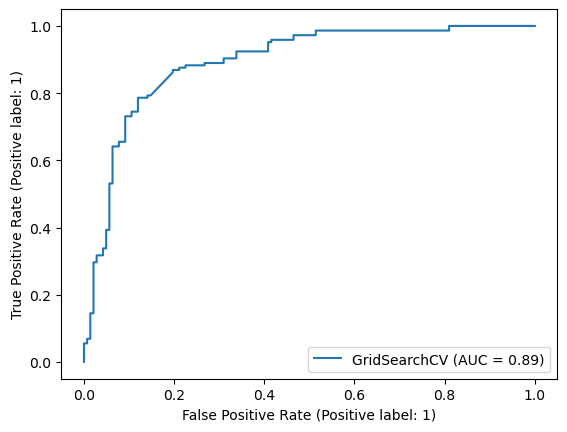

In [218]:
RocCurveDisplay.from_estimator(final_gs, X_test, y_test);

In [231]:
precision_score(y_test, final_preds)

0.8089171974522293

In [232]:
recall_score(y_test, final_preds)

0.8758620689655172

In [233]:
f1_score(y_test, final_preds)

0.8410596026490067

Text(0.5, 1.0, 'Confusion Matrix (1 = Py, 0 = Js)')

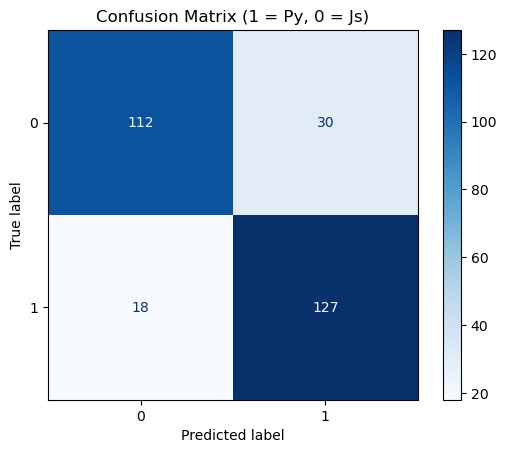

In [256]:
ConfusionMatrixDisplay.from_estimator(final_gs, X_test, y_test, cmap = 'Blues')
plt.title('Confusion Matrix (1 = Py, 0 = Js)')

### Let's now take a look at which feature (words) performed best with Logistic Regression and CountVectorizer

In [223]:
df_coef = pd.DataFrame(zip(
    final_gs.best_estimator_.named_steps.countvectorizer.get_feature_names_out(),  
    final_gs.best_estimator_.named_steps.logisticregression.coef_[0]
), columns = ['Text', 'Coefficient']).sort_values(by = 'Coefficient', ascending = False)

#### 50 words with highest positive coefficients

In [257]:
df_coef.head(50)

,Text,Coefficient
323,like,0.441935
641,write,0.438906
498,scraping,0.433677
87,chatbot,0.410597
160,django,0.404966
216,flask,0.394487
49,authentication,0.391147
522,simple,0.384914
205,fastapi,0.379330
126,course,0.378935


#### 50 words with strongest negative coefficients

In [153]:
df_coef.tail(50)

,Text,Coefficient
81,building,-0.284874
333,local,-0.286346
109,comment,-0.289191
69,best,-0.289743
26,ai,-0.289834
93,chatgpt,-0.291844
226,framework,-0.291885
630,without,-0.292179
303,json,-0.303090
190,every,-0.303261


In [266]:
pd.concat([df_coef.head(5), df_coef.tail(5)]).reset_index(drop = True).sort_values(by = 'Coefficient', ascending = False)

,Text,Coefficient
0,like,0.441935
1,write,0.438906
2,scraping,0.433677
3,chatbot,0.410597
4,django,0.404966
5,typescript,-0.454764
6,browser,-0.561219
7,react,-0.582486
8,spring,-0.738259
9,askjs,-0.747814


### Interpretation of the Coefficients

##### **The presence of the `askjs` feature (word) decreases the probability that a post will be in the `Python` class (subreddit) by 74%**

##### **The presence of the `scraping` feature (word) increases the probability that a post will be in the `Python` class (subreddit) by 44%**